# DCGAN
### This notebook contains an implementation of the model described [here](https://arxiv.org/abs/1511.06434)

In [1]:
from scripts.constants import get_constants

constants = get_constants()

## Dataset

### Loading

In [2]:
from scripts.data.load import load_dataset

dataset_name = "scapes"

dataset = load_dataset(dataset_name, normalize=True, batch=True)

Found 12000 files belonging to 1 classes.


### Training image preview

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


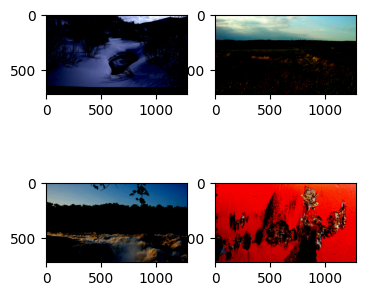

In [3]:
from scripts.data.visualization import display_images
import tensorflow as tf

# Take doesn't alter the dataset itself, so this won't affect the training
for batch in dataset.take(1):
    display_images(batch.numpy(), max_images=19)


## Build GAN

In [4]:
from scripts.model.build import build_dcgan, build_toy_model

generator, discriminator = build_dcgan(dataset_name)

{'num_hidden_conv_layers': 4, 'initial_width': 80, 'initial_height': 45, 'initial_num_filters': 2048}


/home/chen/big_bertha/coding/capstone/art-generator/env/lib/python3.10/site-packages/keras/initializers/initializers_v2.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


## Test Generator output

197.6655740017361 255 0


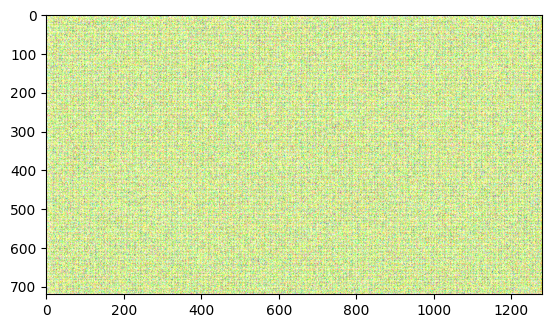

In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

input_noise = tf.random.normal([1, 100])
generated_image = generator(input_noise, training=False)[0]
generated_image = ((generated_image + 1)* 255)
generated_image = generated_image.numpy().astype(np.uint8)
print(np.average(generated_image), np.max(generated_image), np.min(generated_image))
# generated_image[0]
plt.imshow(generated_image)

## Test Discriminator output

In [6]:
decision = discriminator(generated_image.reshape(
                                                    1, 
                                                    constants[dataset_name]['height'], 
                                                    constants[dataset_name]['width'], 
                                                    constants[dataset_name]['num_color_channels']
                                                )
                        )
decision

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.01735644]], dtype=float32)>

## Training the model

In [5]:
import time
from scripts.model.hyperparameters import get_dcgan_hyperparameters
from scripts.model.loss import generator_loss, discriminator_loss
from scripts.model.train import train

hyperparameters = get_dcgan_hyperparameters()

models = {
    'generator': {
        'model': generator,
        'loss': generator_loss,
        'optimizer': hyperparameters['optimizer']
    },
    'discriminator': {
        'model': discriminator,
        'loss': discriminator_loss,
        'optimizer': hyperparameters['optimizer']
    }
}

start = time.time()
train(models, dataset, epochs=1, len_seed=constants['len_seed'], num_test_seeds=16)
end = time.time()
print(f'Total training time (in seconds): {end - start}')

Loss for previous batch #1: Generator loss = 0.6963114738464355, Discriminator loss = 1.3838176727294922
Epoch # 1/1
Batch # 2


KeyboardInterrupt: 

## Rescaling image output from [-1, 1] to [0, 255]

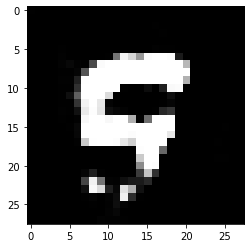

In [110]:
rand_seed = tf.random.normal([1, 100])
image = generator(rand_seed, training=False)[0]
plt.imshow(image[:,:,0], cmap='gray')

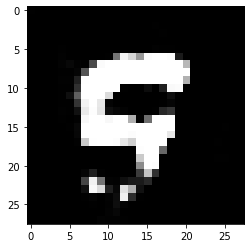

In [111]:
image = (image + 1)/(2) * 255
np.min(image), np.max(image)
# # image = np.expand_dims(image, axis=0)
# # rand_seed
plt.imshow(image[:, :, 0], cmap='gray')

## Saving the model

In [ ]:
generator.save('./models/generator')

In [ ]:
discriminator.save('./models/discriminator')

## Download folder

In [ ]:
!tar cvf toy_model_batch_processing.tgz toy_model_batch_processing/

In [ ]:
!tar cvf generator.tgz ./models/generator